In [1]:
import pandas as pd
import numpy as np

### Preprocessing

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Applying one-hot encoding on all of the non-continuous data

In [3]:
cp_dummies = pd.get_dummies(df["cp"], prefix="cp", drop_first=True)
rest_dummies = pd.get_dummies(df["restecg"], prefix="restecg", drop_first=True)
slope_dummies = pd.get_dummies(df["slope"], prefix="slope", drop_first=True)
ca_dummies = pd.get_dummies(df["ca"], prefix="ca", drop_first=True)
thal_dummies = pd.get_dummies(df["thal"], prefix="thal", drop_first=True)

In [4]:
df = pd.concat([cp_dummies, rest_dummies,slope_dummies, ca_dummies, thal_dummies, df], axis=1)

In [5]:
df

,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,...,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,1,0,0,0,0,0,0,0,...,233,1,0,150,0,2.3,0,0,1,1
1,0,1,0,1,0,0,0,0,0,0,...,250,0,1,187,0,3.5,0,0,2,1
2,1,0,0,0,0,0,1,0,0,0,...,204,0,0,172,0,1.4,2,0,2,1
3,1,0,0,1,0,0,1,0,0,0,...,236,0,1,178,0,0.8,2,0,2,1
4,0,0,0,1,0,0,1,0,0,0,...,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,0,1,0,0,0,0,...,241,0,1,123,1,0.2,1,0,3,0
299,0,0,1,1,0,1,0,0,0,0,...,264,0,1,132,0,1.2,1,0,3,0
300,0,0,0,1,0,1,0,0,1,0,...,193,1,1,141,0,3.4,1,2,3,0
301,0,0,0,1,0,1,0,1,0,0,...,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Dropping unnecessary columns

In [6]:
df = df.drop(["cp", "restecg", "slope", "ca", "thal"], axis=1)

In [7]:
df

,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,...,thal_3,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
0,0,0,1,0,0,0,0,0,0,0,...,0,63,1,145,233,1,150,0,2.3,1
1,0,1,0,1,0,0,0,0,0,0,...,0,37,1,130,250,0,187,0,3.5,1
2,1,0,0,0,0,0,1,0,0,0,...,0,41,0,130,204,0,172,0,1.4,1
3,1,0,0,1,0,0,1,0,0,0,...,0,56,1,120,236,0,178,0,0.8,1
4,0,0,0,1,0,0,1,0,0,0,...,0,57,0,120,354,0,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,0,1,0,0,0,0,...,1,57,0,140,241,0,123,1,0.2,0
299,0,0,1,1,0,1,0,0,0,0,...,1,45,1,110,264,0,132,0,1.2,0
300,0,0,0,1,0,1,0,0,1,0,...,1,68,1,144,193,1,141,0,3.4,0
301,0,0,0,1,0,1,0,1,0,0,...,1,57,1,130,131,0,115,1,1.2,0


In [ ]:
#Converting dataset to numpy array, then sepparating it into X and y 

In [8]:
df_numpy = df.values
df_numpy

array([[0. , 0. , 1. , ..., 0. , 2.3, 1. ],
       [0. , 1. , 0. , ..., 0. , 3.5, 1. ],
       [1. , 0. , 0. , ..., 0. , 1.4, 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 3.4, 0. ],
       [0. , 0. , 0. , ..., 1. , 1.2, 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [9]:
np.random.shuffle(df_numpy)
df_numpy

array([[0. , 0. , 0. , ..., 1. , 2. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 1.6, 1. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 1.2, 0. ],
       [0. , 0. , 1. , ..., 1. , 3.8, 0. ],
       [0. , 1. , 0. , ..., 0. , 1.6, 1. ]])

In [10]:
X = df_numpy[:, :-1].copy()
y = df_numpy[:, -1].copy().reshape(X.shape[0], 1)

In [11]:
X

array([[  0. ,   0. ,   0. , ..., 114. ,   1. ,   2. ],
       [  0. ,   1. ,   0. , ..., 179. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ..., 125. ,   0. ,   1.6],
       ...,
       [  0. ,   0. ,   0. , ..., 115. ,   1. ,   1.2],
       [  0. ,   0. ,   1. , ..., 182. ,   1. ,   3.8],
       [  0. ,   1. ,   0. , ..., 158. ,   0. ,   1.6]])

In [12]:
X = X.astype(float)
y = y.astype(float)

In [ ]:
#Splitting dataset into train and test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

In [ ]:
#Selecting the columns holding continous values from the train dataset, so we can perform normalization on it
#We calculate the mean and std only on the train dataset, so no information is leaked from the test data

In [14]:
X_train_cont = X_train[:, [-8, -6, -5, -3, -1]]
X_train_cont

array([[ 40. , 110. , 167. , 114. ,   2. ],
       [ 47. , 130. , 253. , 179. ,   0. ],
       [ 71. , 112. , 149. , 125. ,   1.6],
       ...,
       [ 70. , 156. , 245. , 143. ,   0. ],
       [ 67. , 120. , 237. ,  71. ,   1. ],
       [ 50. , 144. , 200. , 126. ,   0.9]])

In [15]:
X_mean = np.mean(X_train_cont, axis=0)
X_std = np.std(X_train_cont, axis=0)

In [16]:
X_train_cont = (X_train_cont - X_mean) / X_std

In [17]:
X_train[:, [-8, -6, -5, -3, -1]] = X_train_cont

In [18]:
X_train[:, [-8, -6, -5, -3, -1]].mean(axis=0)

array([ 2.49390000e-16,  3.54396315e-16,  1.07193947e-16, -4.94404736e-16,
        4.81278947e-17])

In [19]:
X_train[:, [-8, -6, -5, -3, -1]].std(axis=0)

array([1., 1., 1., 1., 1.])

In [20]:
X_test_cont = X_test[:, [-8, -6, -5, -3, -1]]

In [21]:
X_test[:, [-8, -6, -5, -3, -1]] = (X_test_cont - X_mean) / X_std

In [22]:
X_test[:, [-8, -6, -5, -3, -1]].mean(axis=0)

array([-0.06371112,  0.15806369,  0.05273571,  0.06048215,  0.17071226])

In [23]:
X_test[:, [-8, -6, -5, -3, -1]].std(axis=0)

array([0.92550129, 1.03763354, 1.06919143, 1.01014369, 1.17982977])

### Training

In [24]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.optim as optim

In [25]:
class TabularData(Dataset):
    '''
        Define a class that inherits the Dataset class for our table
    '''
    def __init__(self, X, y):
        '''
            Initializes the dataset and defines some parameters.
        :param X: torch.tensor
            The X matrix of the dataset
        :param y: torch.tensor
            The y column vector or the target vector; It contains the values we
        are trying to predict;
        '''
        self.X = X
        self.y = y
        
    def __len__(self):
        '''
            Returns the number of entries in the dataset;
        '''
        return self.X.shape[0]
    
    def __getitem__(self, index):
        '''
            Returns a dict containing the different observations on an entry
        and its target value;
        '''
        sample = {"observ": self.X[index, :], "target": self.y[index, :]}
        return sample

In [ ]:
#Converting training data to tensors

In [26]:
X_train = torch.tensor(X_train).to(torch.float32)

In [27]:
y_train = torch.tensor(y_train).to(torch.float32)

In [28]:
X_train

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -1.5448,  1.0000,  0.9393],
        [ 0.0000,  1.0000,  0.0000,  ...,  1.3084,  0.0000, -0.8995],
        [ 0.0000,  0.0000,  0.0000,  ..., -1.0619,  0.0000,  0.5716],
        ...,
        [ 1.0000,  0.0000,  0.0000,  ..., -0.2718,  0.0000, -0.8995],
        [ 0.0000,  0.0000,  0.0000,  ..., -3.4322,  0.0000,  0.0199],
        [ 0.0000,  0.0000,  0.0000,  ..., -1.0180,  1.0000, -0.0720]])

In [ ]:
#Defining the pipeline that our model will consist of

In [29]:
import torch.nn as nn

In [30]:
seq_model = nn.Sequential(nn.Linear(22, 64),
                         nn.ReLU(),
                         nn.Linear(64, 64),
                         nn.ReLU(),
                         nn.Linear(64, 2),
                         nn.LogSoftmax(dim=1))

In [ ]:
#Defining the training data as an instance of the TabularData class definded above

In [31]:
train_data = TabularData(X_train, y_train)

In [ ]:
#Converting test data to tensors
#Defining test data as an instance of TabularData class

In [32]:
X_test = torch.tensor(X_test).to(dtype=torch.float32)
y_test = torch.tensor(y_test)
test_data = TabularData(X_test, y_test)    

In [ ]:
#Defining the loss function, learning rate, optimizer and number of epochs

In [33]:
loss_fn = nn.NLLLoss()

In [34]:
lr = 1e-2

In [35]:
optimizer = optim.SGD(seq_model.parameters(), lr=lr)

In [36]:
n_epochs = 100

In [ ]:
#Defining some dummy vectors that will contain the values of accuracy of our
#model at each epoch

In [37]:
acc = np.zeros(n_epochs)
out_acc = np.zeros(n_epochs)
acc.shape

(100,)

In [38]:
total = len(train_data)
correct = 0
out_correct = 0
cnt = 0

for epoch in range(n_epochs):
    #training loop
    for sample in train_data:
        out = seq_model(sample["observ"].unsqueeze(0))
        loss = loss_fn(out, sample["target"].to(dtype=torch.long))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        _, pred = torch.max(out, dim=1)
        correct += int((pred == sample["target"]).sum())
    
    #test loop
    for sample in test_data:
        train_out = seq_model(sample["observ"].unsqueeze(0))
        out_loss = loss_fn(train_out, sample["target"].to(dtype=torch.long))

        _, out_pred = torch.max(train_out, dim=1)
        out_correct += int((out_pred == sample["target"]).sum())
        
    #Calculating train accuracy at each epoch    
    acc[epoch] = correct / total
    correct = 0
    
    #Calculating train accuracy at each epoch
    out_acc[epoch] = out_correct / len(test_data)
    out_correct = 0
    
    if (epoch + 1) % 10 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 9, Loss: 0.050201
Epoch: 19, Loss: 0.016483
Epoch: 29, Loss: 0.003745
Epoch: 39, Loss: 0.000670
Epoch: 49, Loss: 0.000138
Epoch: 59, Loss: 0.000036
Epoch: 69, Loss: 0.000014
Epoch: 79, Loss: 0.000007
Epoch: 89, Loss: 0.000004
Epoch: 99, Loss: 0.000003


In [ ]:
#From the plot below, we can see that our model starts overfitting somewhere around epoch 10
#There is no reason to train it further if we want our predictions to generalize well

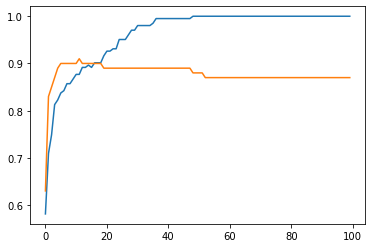

In [39]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0, 100), acc)
plt.plot(np.arange(0, 100), out_acc)

In [ ]:
#Getting the point where the test accuracy peaks
#There is no need to get this exact though

In [40]:
np.argmax(out_acc)

11

In [ ]:
#Applying same training loop, just changing the number of epochs to 11

In [41]:
seq_model = nn.Sequential(nn.Linear(22, 64),
                         nn.ReLU(),
                         nn.Linear(64, 64),
                         nn.ReLU(),
                         nn.Linear(64, 2),
                         nn.LogSoftmax(dim=1))

loss_fn = nn.NLLLoss()

lr = 1e-2

optimizer = optim.SGD(seq_model.parameters(), lr=lr)

n_epochs = np.argmax(out_acc)

In [42]:
total = len(train_data)
correct = 0
out_correct = 0
cnt = 0

for epoch in range(n_epochs):
    for sample in train_data:
        out = seq_model(sample["observ"].unsqueeze(0))
        loss = loss_fn(out, sample["target"].to(dtype=torch.long))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        _, pred = torch.max(out, dim=1)
        correct += int((pred == sample["target"]).sum())
    
    for sample in test_data:
        train_out = seq_model(sample["observ"].unsqueeze(0))
        out_loss = loss_fn(train_out, sample["target"].to(dtype=torch.long))

        _, out_pred = torch.max(train_out, dim=1)
        out_correct += int((out_pred == sample["target"]).sum())
        
        
    acc[epoch] = correct / total
    correct = 0
    
    out_acc[epoch] = out_correct / len(test_data)
    out_correct = 0
    

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.682743
Epoch: 1, Loss: 0.432287
Epoch: 2, Loss: 0.244273
Epoch: 3, Loss: 0.159885
Epoch: 4, Loss: 0.119723
Epoch: 5, Loss: 0.097651
Epoch: 6, Loss: 0.083445
Epoch: 7, Loss: 0.073225
Epoch: 8, Loss: 0.064458
Epoch: 9, Loss: 0.057253
Epoch: 10, Loss: 0.050476


In [ ]:
#Plotting the learning curve again

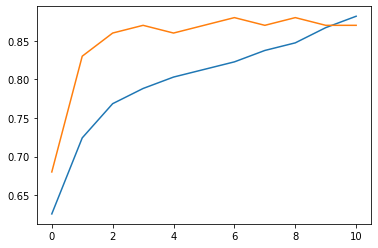

In [43]:
plt.plot(range(0, n_epochs), acc[0:n_epochs])
plt.plot(range(0, n_epochs), out_acc[0:n_epochs])

In [44]:
y_pred = np.zeros_like(y_test)

In [ ]:
#Vector to store training accuracy

In [45]:
acc = np.zeros(len(y_test))

In [ ]:
#Model does pretty well with unseen data, we get an accuracy score of 0.87

In [46]:
total = 0
correct = 0
with torch.no_grad():
    for sample in test_data:
        outputs = seq_model(sample["observ"].unsqueeze(0))
        _, pred = torch.max(outputs, dim=1)
        total += 1
        correct += int((pred == sample["target"]).sum())
        y_pred[total -1] = pred

print("Accuracy: %f", correct / total)

Accuracy: %f 0.87


In [ ]:
#We plot a nice confusion matrix based on our predictions from above

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
cm = confusion_matrix(y_pred, np.array(y_test))

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["not sick", "sick"])

In [ ]:
#It would seem that the model has done fairly well
#There is no obvious tendency to predict a certain class more than another

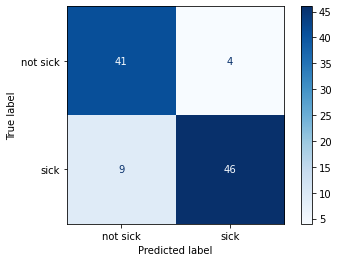

In [50]:
disp = disp.plot(cmap = "Blues")

In [54]:
X_test.shape

torch.Size([100, 22])